**Exercícios Rotulação de Componentes Conexos**
exercícios obtidos em http://homepages.inf.ed.ac.uk/rbf/HIPR2/label.htm


1. Implemente o algoritmo de rotulação de componentes conexos (algoritmo do slide ou por outra solução) e aplique sobre a imagem binária art8.png. Indique qual vizinhança será considerada (4 ou 8)
Mostre os resultados na forma da imagem art8lab1.png e art8lab2.png

art8.png: 
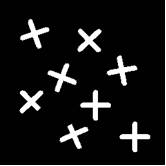
art8lab1.png: 
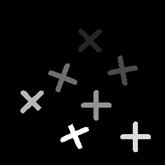
art8lab2.png: 
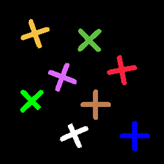
		

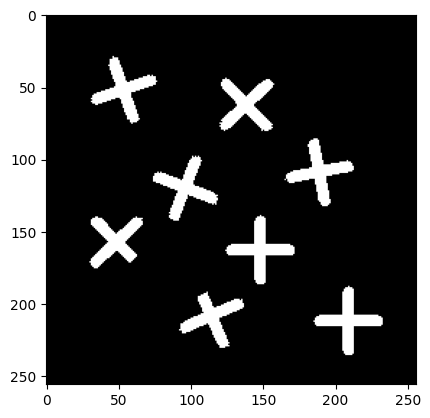

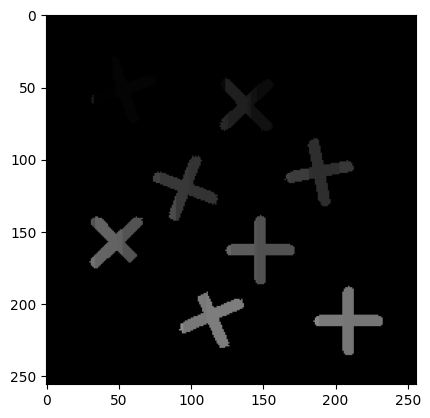

{0.0: 60281,
 4.0: 515,
 1.0: 143,
 2.0: 1,
 31.0: 274,
 8.0: 15,
 11.0: 104,
 10.0: 3,
 17.0: 181,
 25.0: 18,
 27.0: 16,
 28.0: 6,
 29.0: 14,
 30.0: 2,
 38.0: 21,
 40.0: 10,
 41.0: 8,
 42.0: 7,
 44.0: 1,
 46.0: 448,
 47.0: 25,
 48.0: 2,
 51.0: 249,
 53.0: 25,
 55.0: 72,
 54.0: 22,
 57.0: 290,
 60.0: 106,
 65.0: 15,
 64.0: 13,
 66.0: 13,
 68.0: 3,
 67.0: 4,
 73.0: 1,
 74.0: 17,
 75.0: 14,
 76.0: 10,
 77.0: 8,
 78.0: 3,
 81.0: 436,
 99.0: 213,
 83.0: 216,
 82.0: 13,
 84.0: 45,
 85.0: 4,
 87.0: 41,
 96.0: 35,
 97.0: 15,
 98.0: 13,
 100.0: 87,
 91.0: 128,
 102.0: 14,
 104.0: 5,
 106.0: 1,
 112.0: 9,
 113.0: 7,
 114.0: 5,
 115.0: 1,
 117.0: 436,
 118.0: 45,
 125.0: 408,
 119.0: 41,
 120.0: 166,
 122.0: 21,
 123.0: 10,
 121.0: 128,
 134.0: 14,
 136.0: 5,
 138.0: 1,
 142.0: 12,
 143.0: 1}

In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def readBinaryImage(image, invert):
    img = cv2.imread(image, 0)
    if (invert):
        ret, img = cv2.threshold(img, 68, 255, cv2.THRESH_BINARY_INV)
        return img
    else :
        ret, img = cv2.threshold(img, 68, 255, cv2.THRESH_BINARY)
        return img

def get_4_neighborhood(x, y, image):
    if (image[x-1, y] == 255 and image[x, y-1] == 255):
        return True

    return False

def count_components(filename, invert = False):
    count = 1
    equivalences = []
    image = readBinaryImage(filename, invert)

    plt.imshow(image, cmap='gray', vmin=0, vmax=255)
    plt.show(block=False)
    plt.close()

    height, width = image.shape
    labels = np.zeros((height, width))

    for x in range(height):
        for y in range(width):
            pixel = image[x][y]
            if (pixel > 0):
                first_neighbor = image[x-1][y]
                first_neighbor_label = labels[x-1][y]

                second_neighbor = image[x][y-1]
                second_neighbor_label = labels[x][y-1]
            
                if (first_neighbor == 0 and second_neighbor == 0):
                    labels[x][y] = count
                    count+=1
                elif (first_neighbor > 0 and second_neighbor == 0):
                    labels[x][y] = first_neighbor_label
                elif (first_neighbor == 0 and second_neighbor > 0):
                    labels[x][y] = second_neighbor_label
                elif (first_neighbor > 0 and second_neighbor > 0 and first_neighbor_label == second_neighbor_label):
                    labels[x][y] = first_neighbor_label
                elif (first_neighbor > 0 and second_neighbor > 0 and first_neighbor_label != second_neighbor_label):
                    labels[x][y] = first_neighbor_label
                    equivalences.append((first_neighbor_label, second_neighbor_label))

    for i in range(len(equivalences)):
        label_a, label_b = equivalences.pop()

        for j in range(len(equivalences)):
            label_j_a, label_j_b = equivalences[j]
            if (label_b == label_j_b):
                equivalences[j] = (label_j_a, label_a)

        for x in range(height):
            for y in range(width):
                if (labels[x][y] == label_b):
                    labels[x][y] = label_a

    plt.imshow(labels, cmap='gray', vmin=0, vmax=255)
    plt.show(block=False)
    plt.close()

    height, width = labels.shape
    label_dict = {}
    for x in range(height):
        for y in range(width):
            label = labels[x][y]
            if (not label in label_dict):
                label_dict[label] = 1
            else:
                label_dict[label] += 1

    return label_dict

count_components('./art8.png')




    

2. Calcule o número de objetos da imagem clc3.png. Note que antes será necessário binarizar a imagem. Para isso, considere um limiar (*threshold*) de 67, isto é, valores acima de 67 na imagem original recebem zero, e os abaixo recebem 1 (o que resulta na imagem clc3thr1.png).

clc3.png
![clc3.png](clc3.png)
clc3thr1
![clc3thr1.png](clc3thr1.png)
clc3lab1
![clc3lab1.png](clc3lab1.png)
		

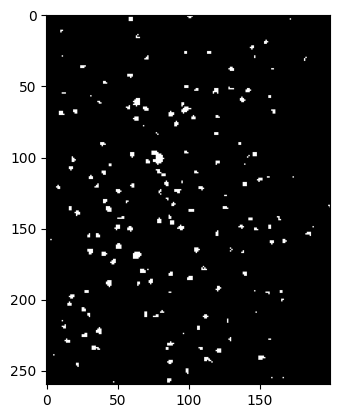

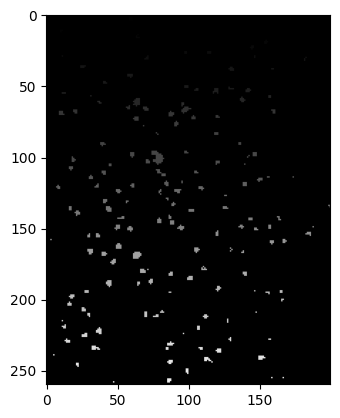

1145


In [31]:
labels = count_components('./clc3thr1.png')

count = 0
for i in labels.items():
  key, value = i
  if (key > 0):
    count+=value

print(count)